In [64]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import pandas as pd

In [65]:
file='data/auto-mpg.csv'
autoDF = pd.read_csv(file)
autoDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [66]:
autoDF.shape

(398, 7)

In [67]:
autoDF.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      2
weight          0
acceleration    0
model-year      0
dtype: int64

In [68]:
autoDF.dropna(inplace=True)

In [69]:
autoDF.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model-year      0
dtype: int64

In [70]:
autoDF2 = autoDF.copy()

In [71]:
y_data = autoDF2.pop('mpg')

In [73]:
import numpy as np
from sklearn.preprocessing import StandardScaler
cols = list(autoDF2.columns)
autoDF2[cols] = StandardScaler().fit_transform(autoDF2)
autoDF2

,cylinders,displacement,horsepower,weight,acceleration,model-year
0,1.494646,1.086866,0.672966,0.627200,-1.290763,-1.632527
1,1.494646,1.499176,1.585529,0.850441,-1.472264,-1.632527
2,1.494646,1.192341,1.194431,0.546881,-1.653765,-1.632527
3,1.494646,1.058100,1.194431,0.543337,-1.290763,-1.632527
4,1.494646,1.038923,0.933698,0.562236,-1.835265,-1.632527
...,...,...,...,...,...,...
393,-0.856416,-0.514431,-0.474256,-0.216154,0.016042,1.617481
394,-0.856416,-0.926741,-1.360746,-0.995725,3.283054,1.617481
395,-0.856416,-0.562374,-0.526403,-0.800832,-1.435964,1.617481
396,-0.856416,-0.706203,-0.656769,-0.411047,1.105046,1.617481


In [74]:
autoDF2.shape

(396, 6)

In [75]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(autoDF2, y_data, test_size=0.2, random_state=42)

In [76]:
x_train

,cylinders,displacement,horsepower,weight,acceleration,model-year
339,-0.856416,-0.408956,-0.526403,-0.399235,0.306443,1.346647
177,-0.856416,-0.754146,-0.239597,-0.329546,-0.201759,-0.278357
64,1.494646,1.192341,1.194431,1.372518,-0.746261,-1.090859
249,1.494646,0.636202,0.151501,0.463018,-0.020258,0.534145
229,1.494646,1.978606,1.976627,1.472917,-1.617464,0.263311
...,...,...,...,...,...,...
72,1.494646,1.058100,1.194431,1.085494,-1.109262,-1.090859
107,0.319115,0.367721,-0.109231,-0.217335,-0.201759,-0.820025
272,-0.856416,-0.408956,-0.500330,-0.139378,0.742044,0.534145
350,-0.856416,-0.850032,-1.073941,-0.895326,-0.238059,1.346647


In [77]:
x_train.keys()

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model-year'],
      dtype='object')

In [78]:
y_train

339    26.6
177    23.0
64     15.0
249    19.9
229    16.0
       ... 
72     15.0
107    18.0
272    23.8
350    34.7
103    11.0
Name: mpg, Length: 316, dtype: float64

# 모델 생성

In [79]:
import keras
from keras import layers

def build_model() :
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(x_train.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
      ])

    optimizer = keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    
    return model
    
model = build_model()
input_shape = x_train.shape  
model.build(input_shape)

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [81]:
example_batch = x_train[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 110ms/step


array([[-0.15543225],
       [-0.01205482],
       [ 0.23623693],
       [-0.01264939],
       [ 0.24316955],
       [-0.19895805],
       [-0.18244946],
       [ 0.261474  ],
       [-0.02791329],
       [ 0.06628691]], dtype=float32)

In [84]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if epoch % 100 ==0:
            print('')
        else:
            print('.',end='')

EPOCHS = 1000

history = model.fit(x_train,y_train,epochs=EPOCHS,validation_split=0.2,verbose=0,callbacks=[PrintDot()])


...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................
...................................................................................................

In [85]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.765363,1.089804,2.765363,9.695606,2.344775,9.695606,995
996,2.832729,1.159235,2.832729,9.157812,2.195641,9.157812,996
997,2.702822,1.110503,2.702822,9.384701,2.228712,9.384701,997
998,2.669705,1.113974,2.669705,8.728379,2.141311,8.728379,998
999,2.693567,1.102752,2.693567,10.921593,2.451581,10.921593,999


In [86]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


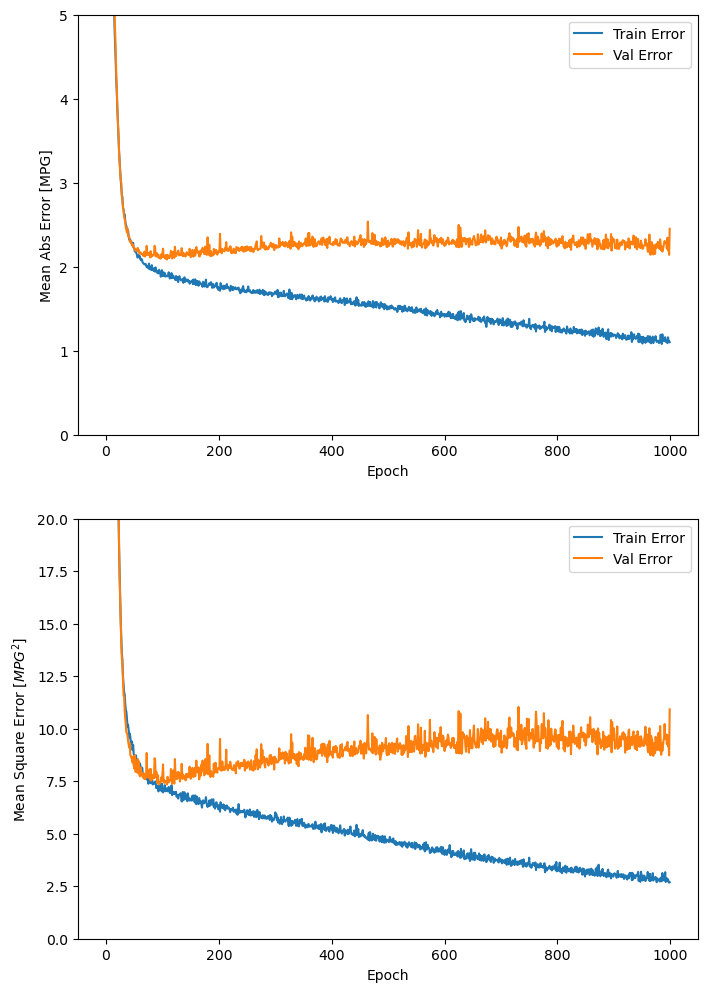

In [87]:
plot_history(history)

In [88]:
loss, mae, mse = model.evaluate(x_test,y_test, verbose=2)

print('test 평균 절대 오차 : {:5.2f}mpg'.format(mae))

3/3 - 0s - loss: 10.3394 - mae: 2.3205 - mse: 10.3394 - 116ms/epoch - 39ms/step
test 평균 절대 오차 :  2.32mpg


3/3 [==============================] - 0s 2ms/step


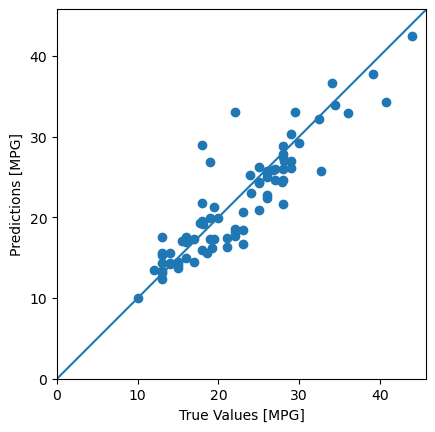

In [89]:
test_predictions = model.predict(x_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])